In [161]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series,DataFrame
from scipy import stats, integrate

import os

#Dohvacanje CSV datoteke za utakmice 
fileDirU = os.path.dirname(os.path.realpath('mozgalo_gladbach_eintracht_utakmice.csv'))
filenameU = os.path.join(fileDirU, '../data/clean/mozgalo_gladbach_eintracht_utakmice.csv')
fileU = os.path.abspath(os.path.realpath(filenameU))

#Dohvacanje CSV datoteke za akcije
fileDirA = os.path.dirname(os.path.realpath('mozgalo_gladbach_eintracht_akcije.csv'))
filenameA = os.path.join(fileDirA, '../data/clean/mozgalo_gladbach_eintracht_akcije.csv')
fileA = os.path.abspath(os.path.realpath(filenameA))

#Dohvacanje XLSX datoteke za akcije
fileDirC = os.path.dirname(os.path.realpath('Once - Lista akcija.xlsx'))
filenameC = os.path.join(fileDirA, '../data/clean/Once - Lista akcija.xlsx')
fileC = os.path.abspath(os.path.realpath(filenameC))

In [162]:
dframe_akcije = pd.read_csv(fileA, sep=",")

In [163]:
dframe_opisAkcije = pd.read_excel(fileC, index_col="ID")
dframe_opisAkcije.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 1 to 384
Data columns (total 1 columns):
keyTitle    376 non-null object
dtypes: object(1)
memory usage: 5.9+ KB


In [164]:
dframe_opisAkcije.loc[247]

keyTitle    TOČNO DODAVANJE
Name: 247, dtype: object

In [165]:
dframe_akcije.head(1)
dframe_akcije.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70303 entries, 0 to 70302
Data columns (total 25 columns):
ID                  70303 non-null int64
gameID              70303 non-null int64
actionStartTime     70303 non-null float64
actionEndTime       70303 non-null float64
actionID            70303 non-null int64
bindedActionID      70303 non-null int64
actionOptionID      70303 non-null int64
playerID            70303 non-null int64
touchNumber         70303 non-null int64
playerTeam          70303 non-null object
actionPosX1         70303 non-null int64
actionPosX2         70303 non-null int64
actionPosY1         70303 non-null float64
actionPosY2         70303 non-null float64
targetPlayerID      70303 non-null int64
goalZone            5201 non-null object
distance            70303 non-null float64
refPositionX        70303 non-null int64
refPositionY        70303 non-null float64
startPossTime       70303 non-null float64
endPossTime         70303 non-null float64
gameTimeSecti

In [166]:
grouped = dframe_akcije.groupby(["gameID","actionID","playerTeam"]).count()
grouped.head(2)

ID  actionStartTime  actionEndTime  \
gameID actionID playerTeam                                       
6258   2        away         9                9              9   
                home         4                4              4   

                            bindedActionID  actionOptionID  playerID  \
gameID actionID playerTeam                                             
6258   2        away                     9               9         9   
                home                     4               4         4   

                            touchNumber  actionPosX1  actionPosX2  \
gameID actionID playerTeam                                          
6258   2        away                  9            9            9   
                home                  4            4            4   

                            actionPosY1      ...       goalZone  distance  \
gameID actionID playerTeam                   ...                            
6258   2        away                  9      ...              9         9   
                home                  4      ...              4         4   

                            refPositionX  refPositionY  startPossTime  \
gameID actionID playerTeam                                              
6258   2        away                   9             9              9   
                home                   4             4              4   

                            endPossTime  gameTimeSection  playerPositionID  \
gameID actionID playerTeam                                                   
6258   2        away                  9                9                 9   
                home                  4                4                 4   

                            targetPositionID  awayTeamSide  
gameID actionID playerTeam                                  
6258   2        away                       9             9  
                home                       4             4  

[2 rows x 22 columns]

In [167]:
grouped = grouped.drop(grouped.columns[[range(1,22)]],axis =1)
grouped.head(2)

ID
gameID actionID playerTeam    
6258   2        away         9
                home         4

In [168]:
grouped = grouped.unstack("playerTeam")

In [169]:
grouped

ID     
playerTeam      away home
gameID actionID          
6258   2           9    4
       3           3  NaN
       4          17    2
       6           8    7
       7          13   13
       10          3    1
       11          6    5
       13          1    3
       15         76   88
       17          5   21
       18         25   17
       19         34   20
       21          3    1
       22         11   13
       23          7    3
       30         52   24
       31          9    2
       32          4    1
       33          4    5
       63          1  NaN
       64          2  NaN
       65          5    4
       75          5    4
       111       NaN    1
       114       NaN    1
       115         4    1
       116         2  NaN
       117         5    1
       118         6    1
       211        51   73
...              ...  ...
6770   99        NaN    1
       111       NaN    2
       115       NaN    1
       116       NaN    1
       117         2    1
       118         3    2
       156         1    1
       163       NaN    1
       211        85   79
       212         3    2
       213         6   23
       214       NaN    3
       218        91  100
       232        41   22
       247       191  417
       248       181  194
       260         2    8
       261        24   22
       262         3   14
       274         5    2
       275        11    4
       276         1    1
       320         2    1
       342       NaN    1
       343         1    1
       352         1    1
       353         2  NaN
       367       NaN    1
       371        30   29
       375         3  NaN

[1589 rows x 2 columns]

In [170]:
#Ručno obrisano
#grouped.to_csv("test")

In [171]:
grouped = pd.read_csv("lista_akcija")
grouped.head()

,gameID,actionID,away,home
0,6258,2,9,4
1,6258,3,3,NaN
2,6258,4,17,2
3,6258,6,8,7
4,6258,7,13,13


In [172]:
grouped.fillna(value = 0,inplace="True")

In [173]:
grouped["A+H"] = grouped["away"] + grouped["home"]
grouped

,gameID,actionID,away,home,A+H
0,6258,2,9,4,13
1,6258,3,3,0,3
2,6258,4,17,2,19
3,6258,6,8,7,15
4,6258,7,13,13,26
5,6258,10,3,1,4
6,6258,11,6,5,11
7,6258,13,1,3,4
8,6258,15,76,88,164
9,6258,17,5,21,26


for game in dframe_akcije.gameID.unique():
    #print (nameA)
    hp = 0
    ap = 0
    for indexA, nameA in dframe_akcije.iterrows():
        #print ("t")
        if (game == nameA['gameID']):
            if (nameA['playerTeam'] == "home"):
                #do something
                
                #nameA['actionID'].values_count()
                if(nameA['actionID'] == 211):
                    #df[df["class"]==1].count()["value"]
                    #nameA[nameA.actionID == 247].sum()
                    hp = hp + 1 
            if (nameA['playerTeam'] == "away"):
                #do something
                if(nameA['actionID'] == 211):
                    ap = ap + 1 
    #debug
    #print ("Broj matcha" + str(game))
    #print ("Home dodavanja" + str(hp)
    #print ("Away dodavanja"+ str(ap)
    print ("Utakmica " + str(game) + " ima tocnih dodavanja za domace " + str(hp) + " ima tocnih dodavanja za goste " + str(ap))

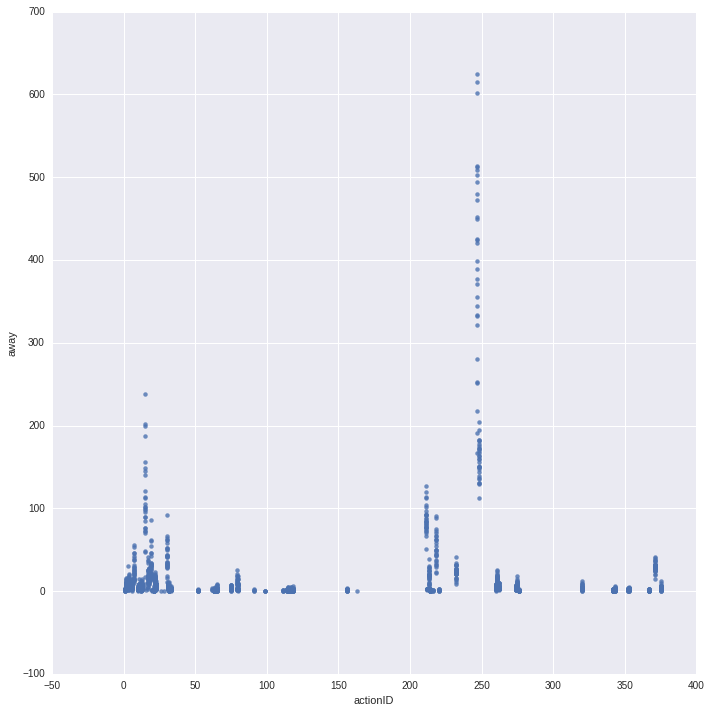

In [181]:
sns.lmplot("actionID","away", data= grouped, fit_reg=False,size=10)

In [186]:
match = grouped.loc[grouped['gameID'] == 6258]

In [185]:
match

,gameID,actionID,away,home,A+H
1529,6770,1,1,1,2
1530,6770,2,5,14,19
1531,6770,3,4,2,6
1532,6770,4,2,13,15
1533,6770,6,0,8,8
1534,6770,7,56,62,118
1535,6770,10,6,5,11
1536,6770,11,6,2,8
1537,6770,12,6,0,6
1538,6770,13,8,2,10


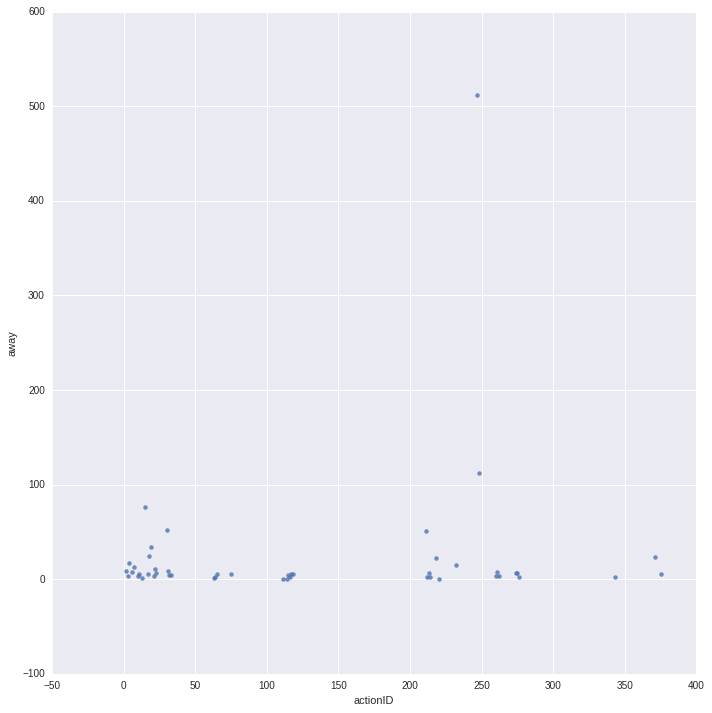

In [191]:
sns.lmplot("actionID","away", data= match, fit_reg=False,size=10)

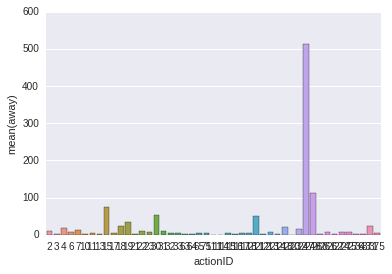

In [195]:
sns.barplot( x= "actionID",y = "away", data= match,)